<a href="https://colab.research.google.com/github/manoharreddyvoladri/Data-science-/blob/main/21BRS1177_LAB04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
print("Voladri Manohar Reddy")
print("Reg.No: 21BRS1177 ")
print("Slot : L37 + L38")
print("LAB - 04")

Voladri Manohar Reddy
Reg.No: 21BRS1177 
Slot : L37 + L38
LAB - 04


In [ ]:
'''


Task 1: ID3 for Classification

•	Import the necessary libraries (e.g., pandas, scikit-learn).
•	Load a classification dataset
•	Preprocess the data (handle missing values, encode categorical variables if necessary).
•	Implement ID3 algorithm for classification using a recursive approach.
•	Train the decision tree on the dataset.
•	Evaluate the performance of the decision tree using metrics like accuracy, precision, recall, and F1-score.
•	Visualize the decision tree.

dataset:' https://www.kaggle.com/datasets/saurabh00007/diabetescsv '


'''

In [ ]:
# Task 1: ID3 for Classification

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz

In [68]:
df = pd.read_csv('/content/diabetes.csv')
df = df.drop('SkinThickness', 'columns')
df = df.dropna()


<ipython-input-68-782f3ceec45a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('SkinThickness', 'columns')


In [69]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [70]:
df = df[(df[['Glucose','BloodPressure','Insulin', 'BMI','DiabetesPedigreeFunction','Age']] != 0).all(axis=1)]

In [71]:
split_data = train_test_split(df, test_size=.30)


In [72]:
train_data = split_data[0]
test_data = split_data[1]

In [73]:
outcome_train = train_data.Outcome.tolist()
outcome_test = test_data.Outcome.tolist()

In [74]:
train_data_remove = train_data.drop(columns = "Outcome")
test_data_remove = test_data.drop(columns = "Outcome")

In [75]:
# ID3
clf = sklearn.tree.DecisionTreeClassifier(criterion = "entropy")
clf.fit(train_data_remove, outcome_train)

DecisionTreeClassifier(criterion='entropy')

In [76]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Diabetes")

'Diabetes.pdf'

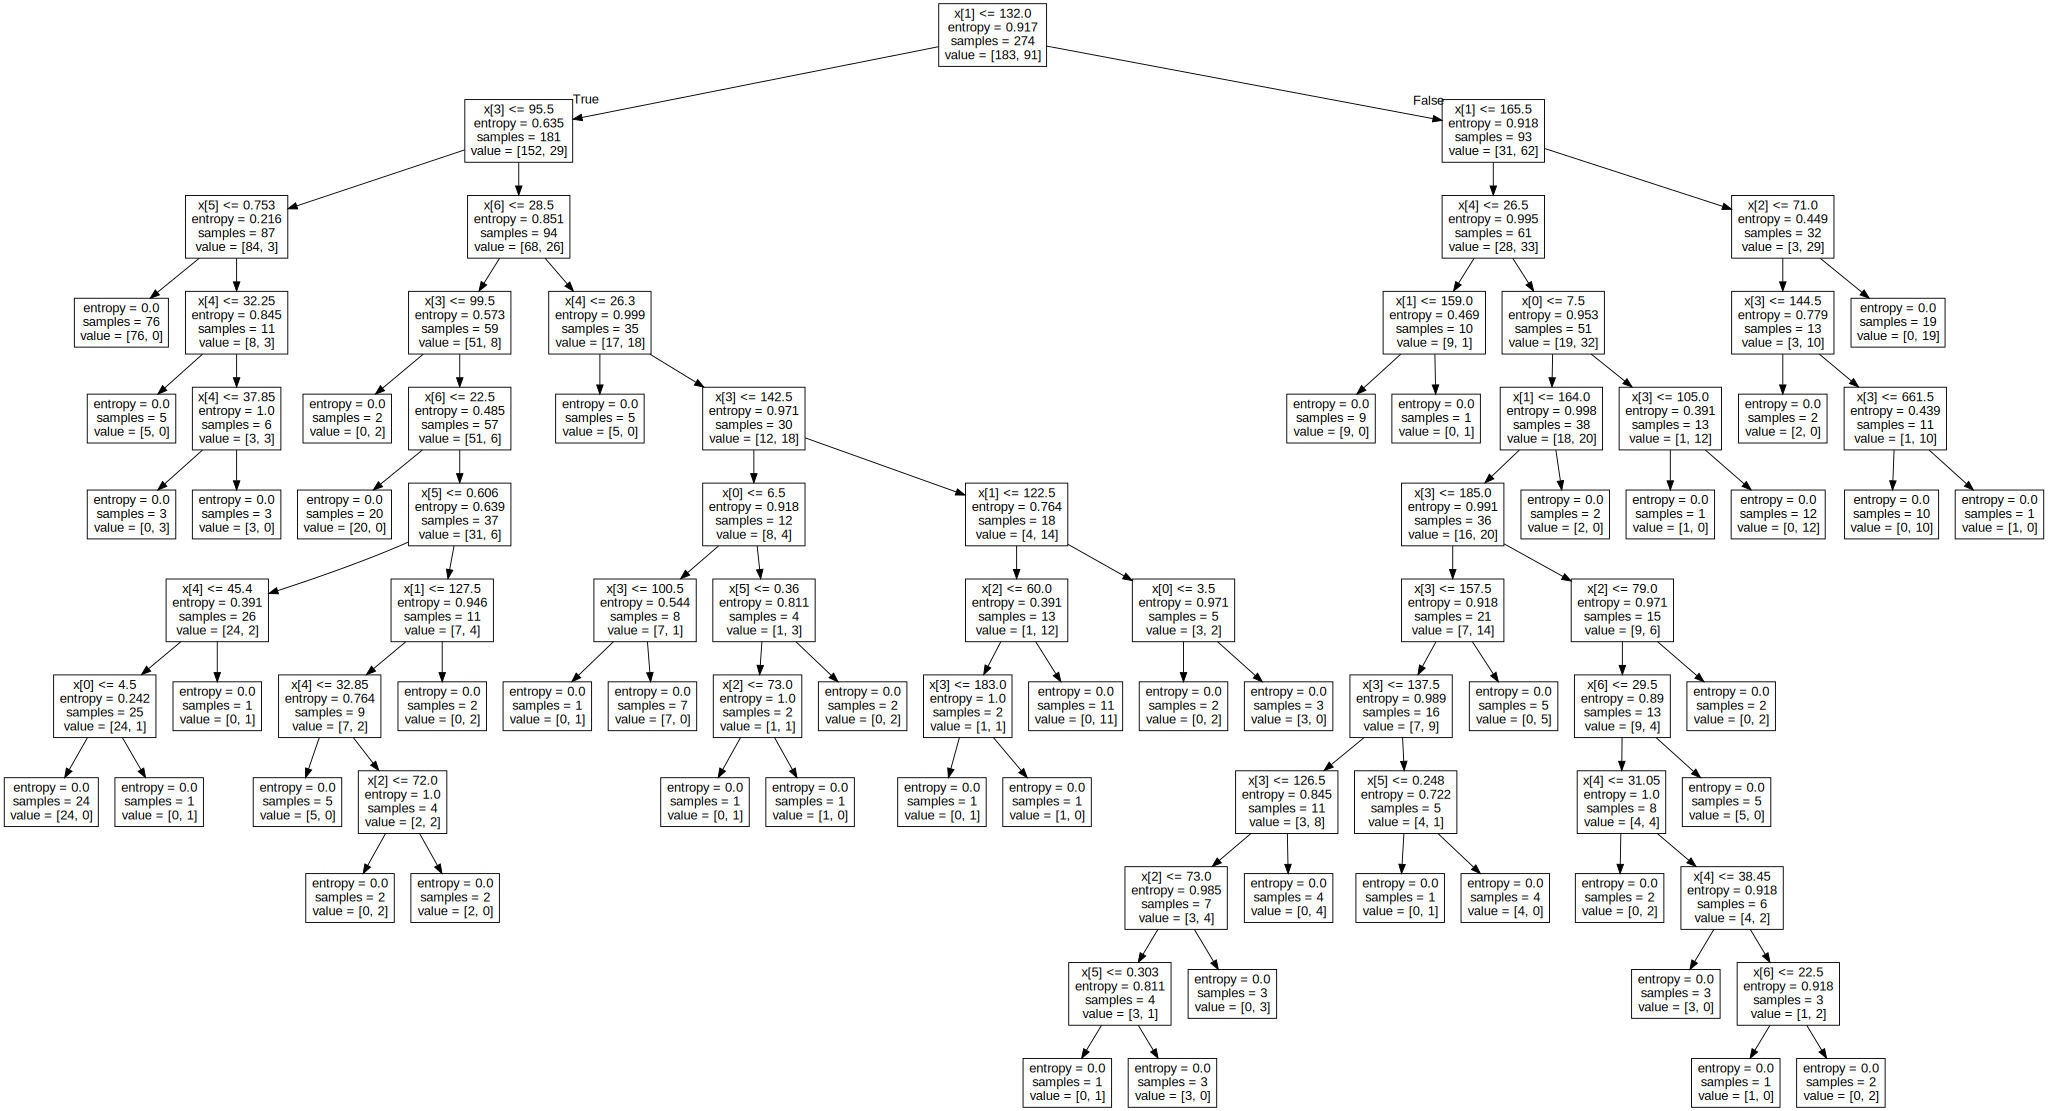

In [77]:
graph

In [ ]:
'''
Task 2: Regression Tree
•	Import the necessary libraries (e.g., pandas, scikit-learn).
•	Load a regression dataset (e.g., Boston Housing dataset).
•	Preprocess the data (handle missing values, normalize/standardize features if necessary).
•	Implement a Regression Tree algorithm using a recursive approach.
•	Train the regression tree on the dataset.
•	Evaluate the performance of the regression tree using metrics like Mean Squared Error (MSE) or R-squared.
•	Visualize the regression tree.


'''

In [ ]:
#Task 2: Regression Tree

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Regression Tree Algorithm
from sklearn.tree import DecisionTreeRegressor
# Split our data into a training and testing data
from sklearn.model_selection import train_test_split

In [33]:
df = pd.read_csv('/content/regression tree data set.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [34]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [35]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [36]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [37]:
df = df.fillna(df.mean())

In [38]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [39]:
X = df.drop(columns=["MEDV"])
Y = df["MEDV"]

In [40]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

In [53]:
regression_tree = DecisionTreeRegressor(criterion = 'squared_error')

In [54]:
regression_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [55]:
regression_tree.score(X_test, Y_test)

0.7669515632053588

In [56]:
prediction = regression_tree.predict(X_test)

print("$",(prediction - Y_test).abs().mean()*1000)

$ 3252.9411764705874


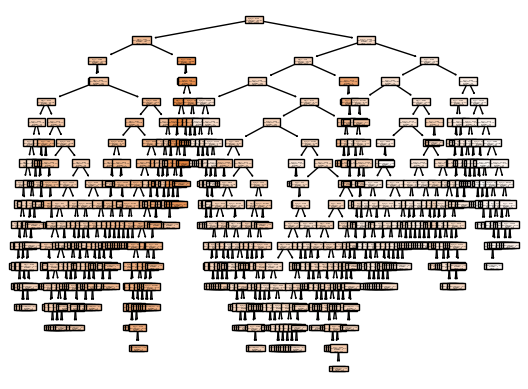

In [57]:
from sklearn.tree import plot_tree
plot_tree(regression_tree,filled=True)
plt.show()